In [1]:
from pipeline_performance_loader import initialization, read_feature
import glob
from collections import defaultdict
import numpy as np
import math
from matplotlib import pyplot as plt

In [14]:
def compute_percentiel(data):
	percentile = []
	for i in [5, 25, 50, 75, 95]:
		percentile.append(np.percentile(data, i))

	return percentile


def bucketize_feature(feature, perf, num_of_bucket=4):
	feature_range = (min(feature), max(feature))
	featuer_list = []
	perf_list = []
	feature_bins = np.logspace(math.log10(feature_range[0]), math.log10(feature_range[1]), num=num_of_bucket+1)
	perf_bucket = defaultdict(list)
	for i in range(len(feature)):
		current_feature = feature[i]
		if current_feature >= feature_bins[-1]:
			current_bin = len(feature_bins) - 1 
		else:
			current_bin = next(x[0] for x in enumerate(feature_bins) 
								if x[1] >= current_feature)

		perf_bucket[feature_bins[current_bin]].append(perf[i])


	return perf_bucket

In [3]:
all_feature_names, moving, video_to_delete, selected_video, glimpse_video_to_delete = initialization()
path = '../feature_analysis/video_features_30s/'
# feature_file = path + 'features_all_type_width_height_filter.csv'
feature_file = path + 'allvideo_features_long_add_width_20_filter.csv'
features = read_feature(feature_file)

driving2_3,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017777777777777778,0,0.03079506172839507,0.17548521797688565,10.38655522428052,109.89372638584705,0.03079506172839507,0.0,0.0,0.0,0.0,0.0,2.252728336819822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_8,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0

driving2_27,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,nan,

In [5]:
# load videostorm and glimpse performance
# load selected videos

def AW_parser(path):
    perf = {}
    with open(path, 'r') as f:
        f.readline()
        for line in f:
            line_list = line.strip().split(',')
            dataset_name = line_list[0].replace('_' + 
                           line_list[0].split('_')[-1], '')
            key = line_list[0]
            resol = int(line_list[2].replace('p', ''))
            f1 = float(line_list[3])
            bw = float(line_list[4])
            perf[key] = (bw, f1, resol)
    return perf

def VG_parser(path):
    perf = {}
    for file in glob.glob(path + 'vigil_*.csv'):
        with open(file, 'r') as f:
            f.readline()
            for line in f:
                line_list = line.strip().split(',')
                dataset_name = line_list[0].replace('_' + \
                                line_list[0].split('_')[-1], '')
                f1 = float(line_list[1])
                gpu = float(line_list[2])
                area = float(line_list[3])
                true_area = float(line_list[4])
                perf[line_list[0]]= (gpu, f1, area, true_area)
    return perf 



aw_path = './awstream/awstream_selected_video_resol_0.9_label_merge_add_width_20_filter.csv'
aw_perf = AW_parser(aw_path)
vg_path = './vigil/vigil_mobilenet_results_10_11/'
vg_perf = VG_parser(vg_path)

In [6]:
# load selected videos for GL and VS
selected_video_path = './video_selection_results/'
selected_videos = []
with open(selected_video_path + 'aws_video_selection.csv', 'r') as f:
    f.readline()
    for line in f:
        line_list = line.strip().split(',')
        if line_list[3] == '':
            break
        selected_videos.append(line_list[3])
        
print(selected_videos)

['crossroad_14', 'crossroad2_74', 'driving_downtown_33', 'segment-12866817684252793621_480_000_500_000', 'segment-10723911392655396041_860_000_880_000', 'segment-6038200663843287458_283_000_303_000', 'segment-6128311556082453976_2520_000_2540_000', 'segment-7517545172000568481_2325_000_2345_000', 'segment-7861168750216313148_1305_290_1325_290', 'segment-4167304237516228486_5720_000_5740_000', 'segment-9415086857375798767_4760_000_4780_000', 'segment-3451017128488170637_5280_000_5300_000', 'segment-16153607877566142572_2262_000_2282_000', 'segment-16105359875195888139_4420_000_4440_000', 'segment-2681180680221317256_1144_000_1164_000', 'segment-5990032395956045002_6600_000_6620_000', 'segment-5302885587058866068_320_000_340_000', 'segment-4759225533437988401_800_000_820_000', 'segment-15533468984793020049_800_000_820_000_with_camera_labels', 'segment-14233522945839943589_100_000_120_000_with_camera_labels', 'segment-15578655130939579324_620_000_640_000_with_camera_labels', 'segment-1347

In [9]:
perf1 = []
perf2 = []
feature1 = []
feature2 = []
for key in selected_videos:
    if key not in features or key not in aw_perf or key not in vg_perf:
        continue
    feature1.append(features[key][all_feature_names.index('velocity_avg')])
    feature2.append(features[key][all_feature_names.index('percentage')])
    perf1.append(aw_perf[key][0])
    perf2.append(vg_perf[key][0])

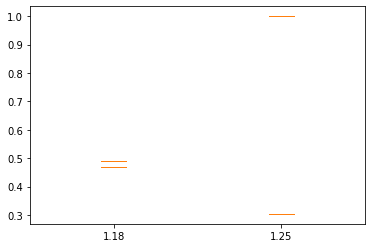

In [16]:
feature = feature1
aw_perf_bucket = bucketize_feature(feature, perf1)
vg_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
aw_all_percentile = []
vg_all_percentile = []
xticks =  []
for key in sorted(aw_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = aw_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    aw_all_percentile.append(percentile)
    current_perf = vg_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    vg_all_percentile.append(percentile)
ax.boxplot(vg_all_percentile,showfliers=False, patch_artist=True)
bp = ax.boxplot(aw_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(aw_all_percentile) + 1), xticks)      
plt.show()




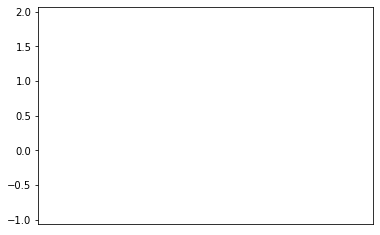

In [15]:
feature = feature2
aw_perf_bucket = bucketize_feature(feature, perf1)
vg_perf_bccket = bucketize_feature(feature, perf2)
fig, ax = plt.subplots()
aw_all_percentile = []
vg_all_percentile = []
xticks =  []
for key in sorted(aw_perf_bucket.keys())[1:]:
    xticks.append(format(key, '02.2f'))
    current_perf = aw_perf_bucket[key]
    percentile = compute_percentiel(current_perf)
    aw_all_percentile.append(percentile)
    current_perf = vg_perf_bccket[key]
    percentile = compute_percentiel(current_perf)
    vg_all_percentile.append(percentile)
ax.boxplot(vg_all_percentile,showfliers=False, patch_artist=True)
bp = ax.boxplot(aw_all_percentile,showfliers=False, patch_artist=True)
for patch in bp['boxes']:
    patch.set(facecolor='r') 
plt.xticks(np.arange(1, len(aw_all_percentile) + 1), xticks)      
plt.show()



In [ ]:
for i in range(len(feature1)):
    if perf1[i] > perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'r')
    if perf1[i] < perf2[i]:
        plt.scatter(feature2[i], feature1[i], c = 'b')